In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [9]:
df_train = pd.read_csv('Data/train.csv')

Data exploration

In [13]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [14]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

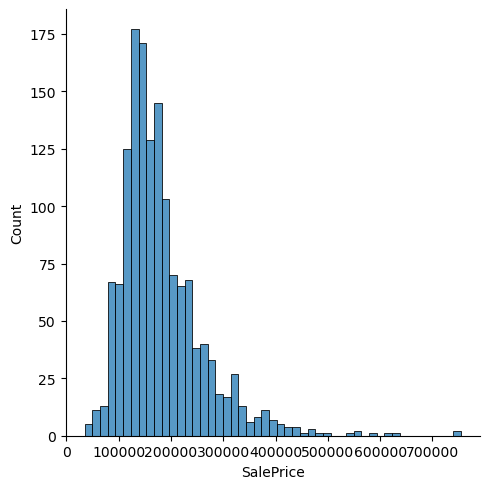

In [15]:
sns.displot(df_train['SalePrice']);

In [21]:
print(f"Skewness is: {df_train['SalePrice'].skew()}")
print(f"Kurtosis is: {df_train['SalePrice'].kurt()}")

Skewness is: 1.8828757597682129
Kurtosis is: 6.536281860064529


In [39]:
sale_grliv = pd.concat([df_train['SalePrice'], df_train['GrLivArea']], axis=1)

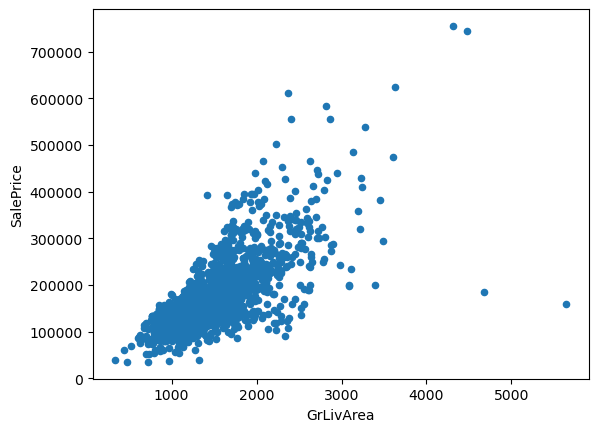

In [41]:
sale_grliv.plot.scatter(x='GrLivArea', y='SalePrice');

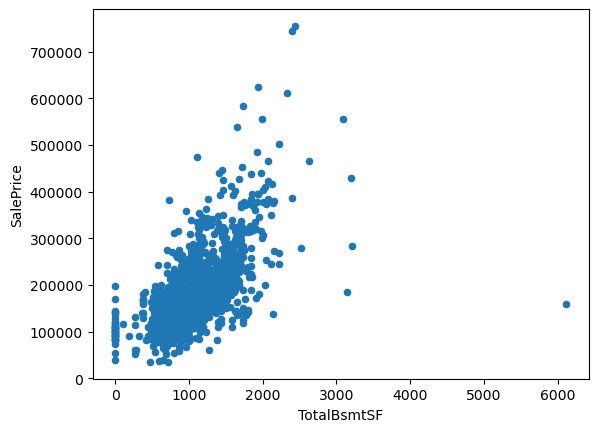

In [48]:
sale_bsmt = df_train[['SalePrice', 'TotalBsmtSF']]
sale_bsmt.plot.scatter(x='TotalBsmtSF', y='SalePrice');

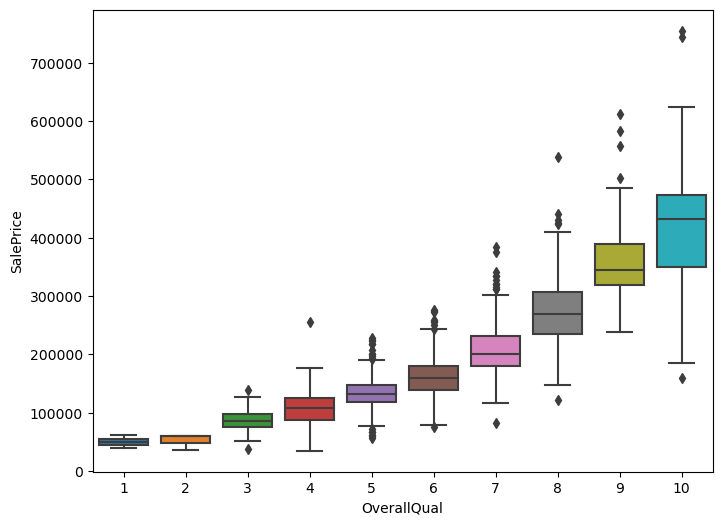

In [49]:
sale_qual = df_train[['SalePrice', 'OverallQual']]
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x='OverallQual', y = 'SalePrice', data=sale_qual)

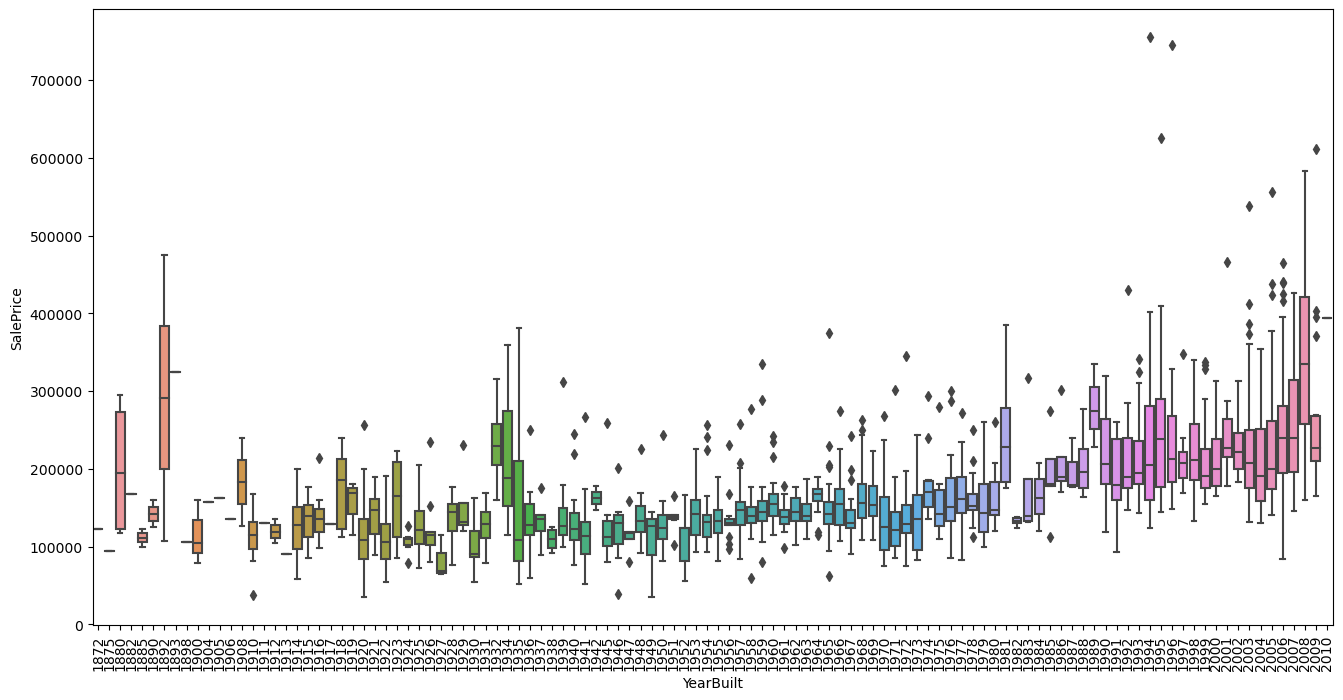

In [55]:
sale_builtyear = df_train[['SalePrice', 'YearBuilt']]
f, ax = plt.subplots(figsize=(16,8))
fig = sns.boxplot(x='YearBuilt', y='SalePrice', data=sale_builtyear)
plt.xticks(rotation=90);

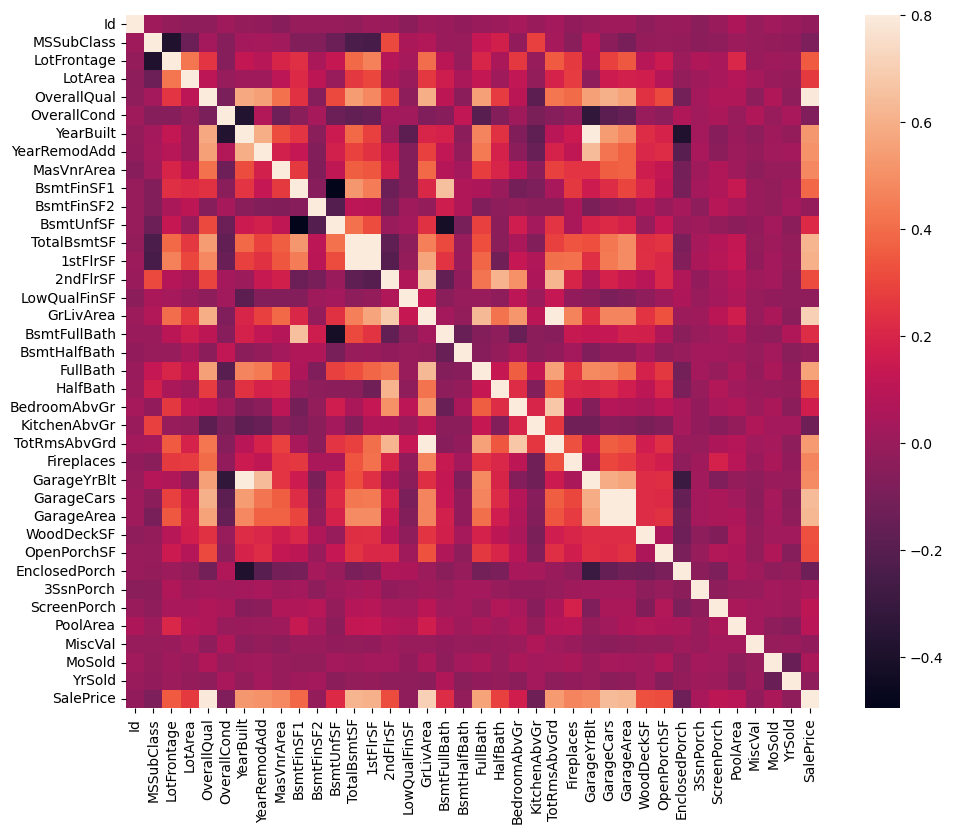

In [62]:
corrmat = df_train.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

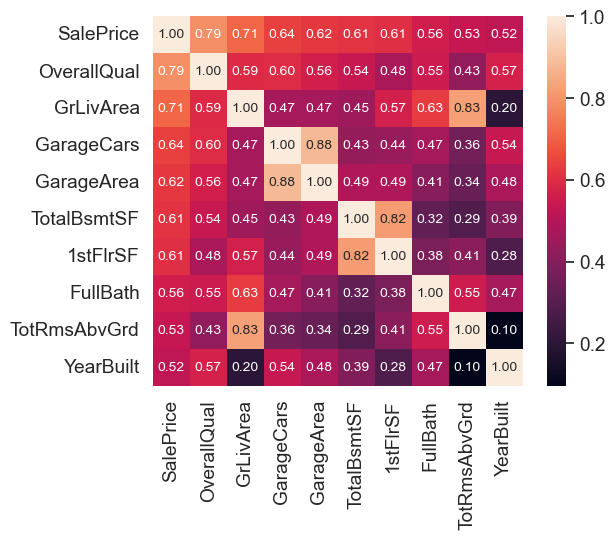

In [85]:
k = 10
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

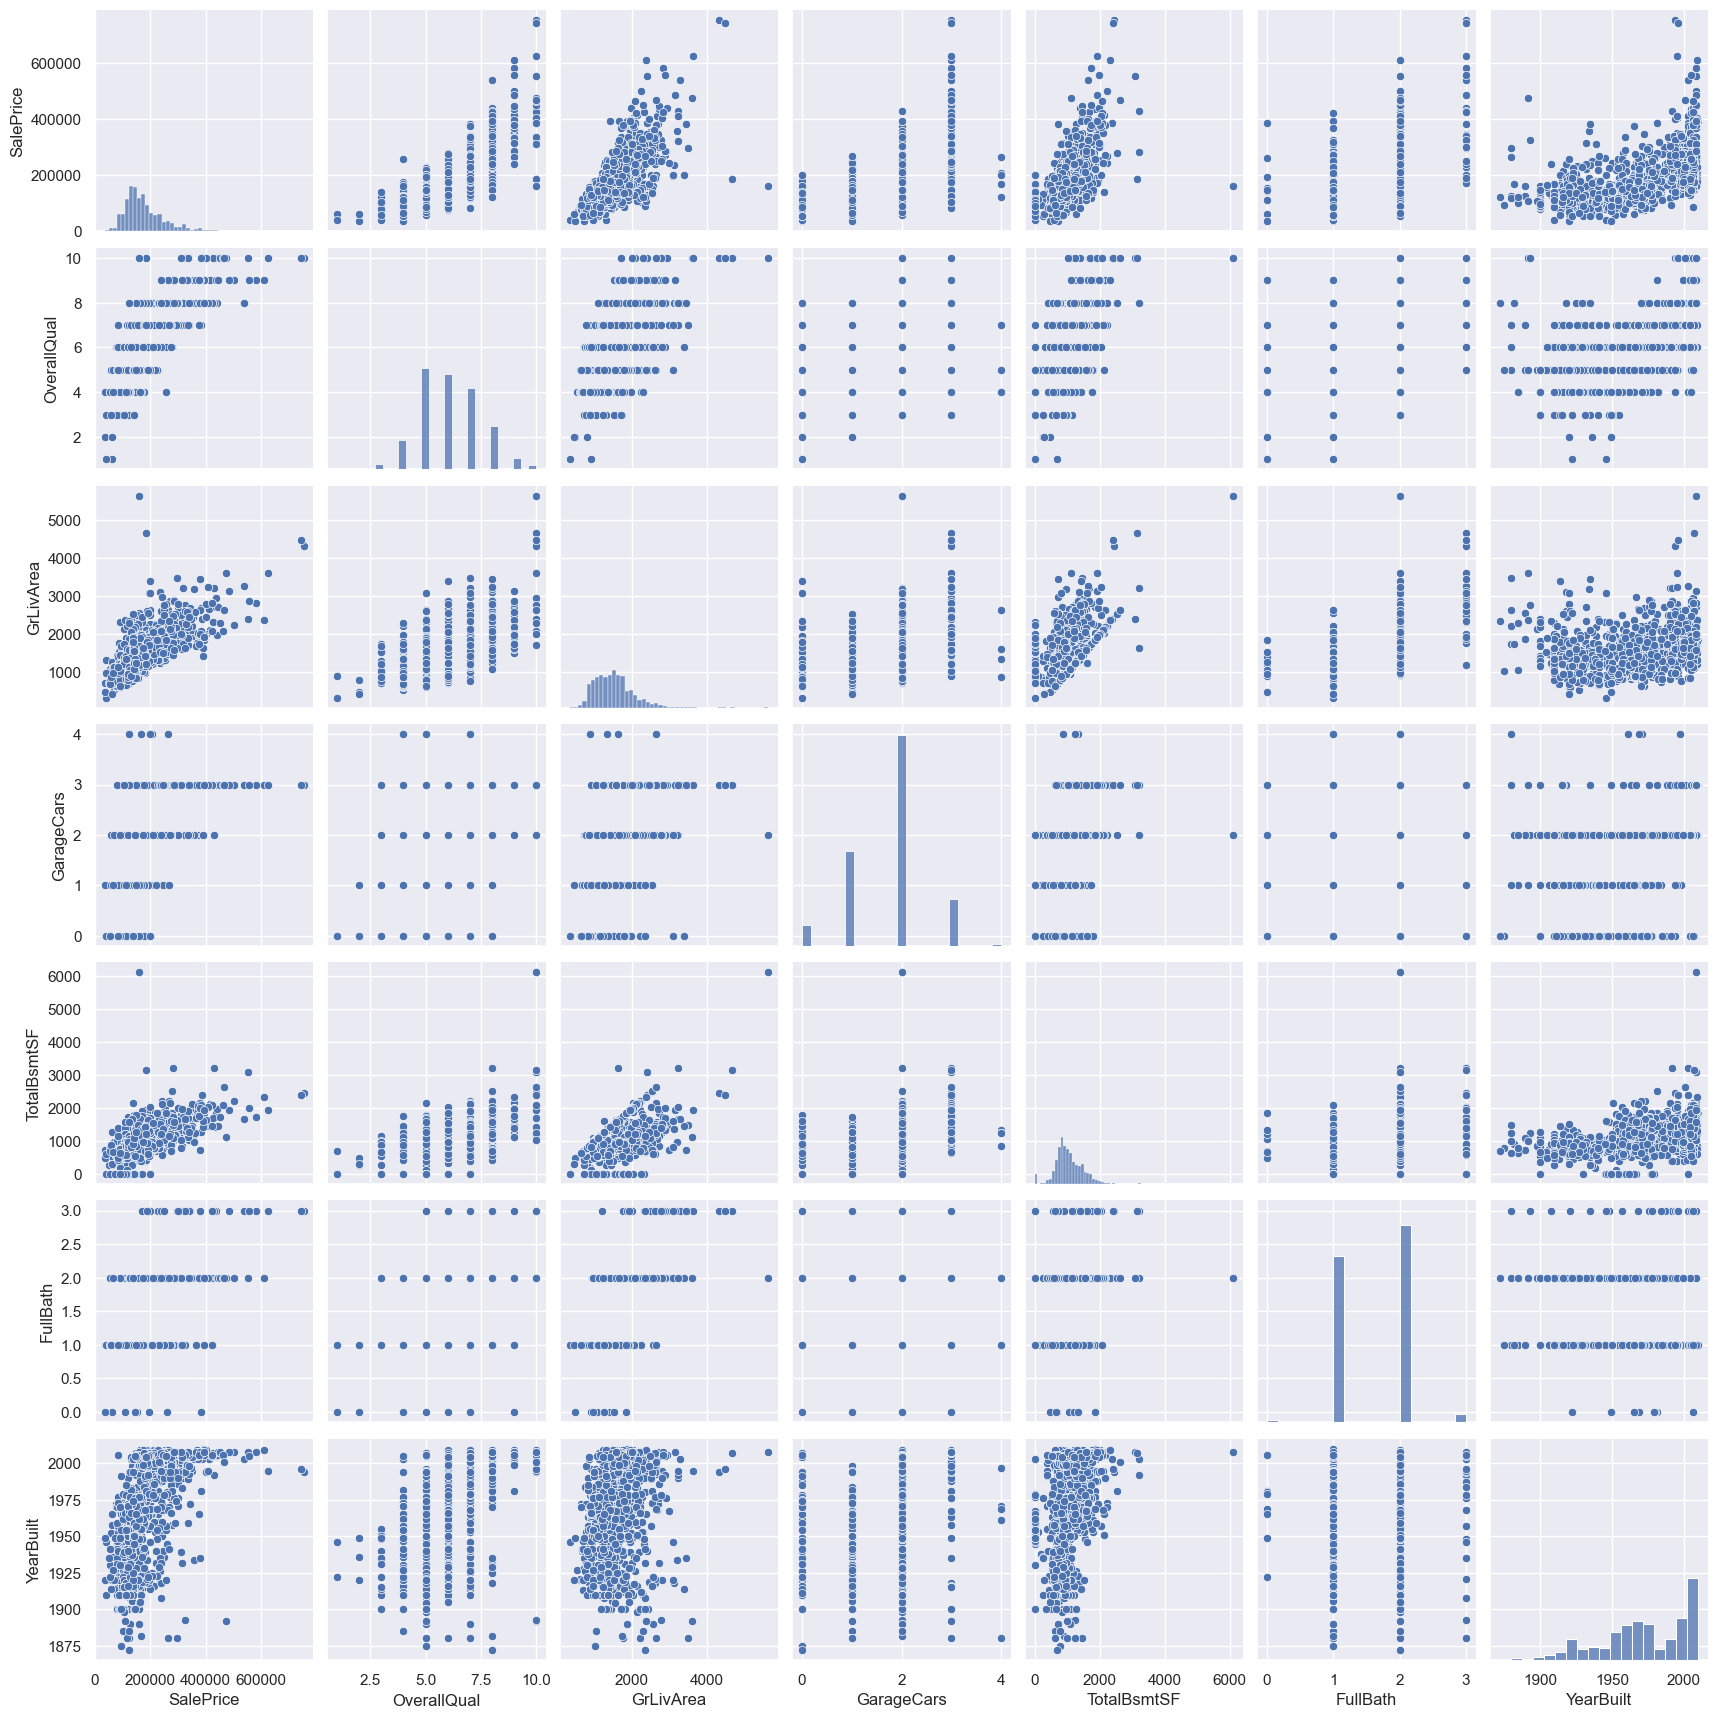

In [107]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size=2.5)
plt.show();

Cleaning data

In [139]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(22)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
MasVnrType,872,0.597260
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479


In [141]:
df_train.drop((missing_data[missing_data['Total'] > 1]).index, axis=1, inplace=True)
df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index, inplace=True)
df_train.isnull().sum().max()

0

In [133]:
df_train.drop((missing_data[missing_data['Total'] > 1]).index, 1, inplace=True)
df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index, inplace=True)
df_train.isnull().sum().max()

Index([1379], dtype='int64')

In [147]:
saleprice_values_2d = df_train['SalePrice'].values
saleprice_values_2d = saleprice_values.reshape(-1, 1)

saleprice_scaled = StandardScaler().fit_transform(saleprice_values_2d)
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


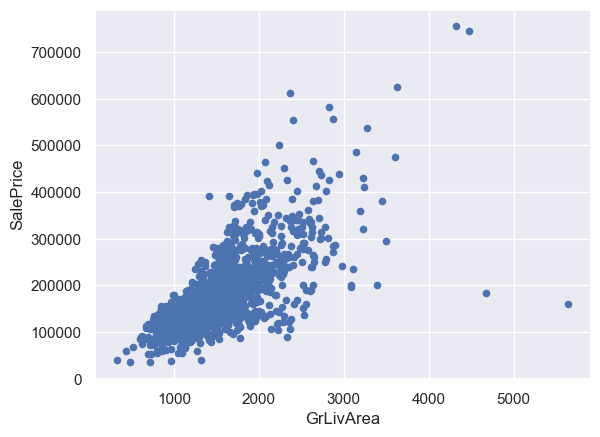

In [156]:
sale_grliv.plot.scatter(x='GrLivArea', y='SalePrice');

In [157]:
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000
523,524,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,184750


In [158]:
df_train.drop(df_train[df_train['Id']==1299].index, inplace=True)
df_train.drop(df_train[df_train['Id']== 524].index, inplace=True)

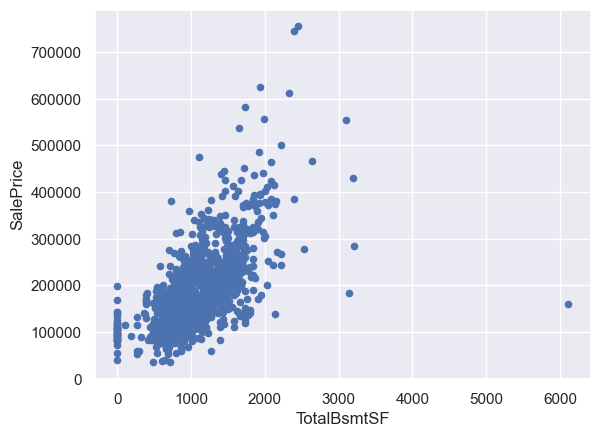

In [160]:
sale_bsmt.plot.scatter(x='TotalBsmtSF', y='SalePrice');

In [162]:
df_train.sort_values(by = 'TotalBsmtSF', ascending = False)[:2]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
332,333,20,RL,10655,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2009,WD,Normal,284000
496,497,20,RL,12692,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,291,0,0,0,0,5,2007,WD,Normal,430000


In [163]:
df_train.drop(df_train[df_train['Id']==333].index, inplace=True)

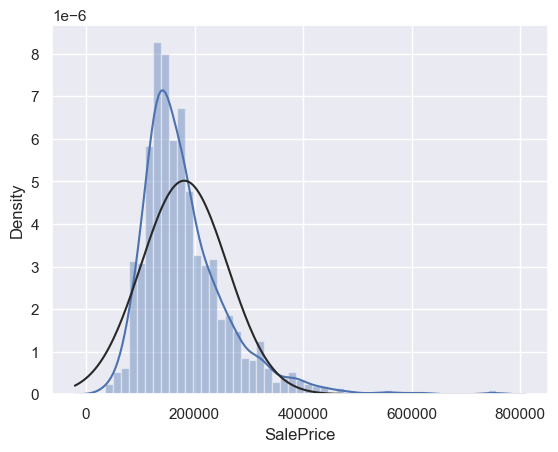

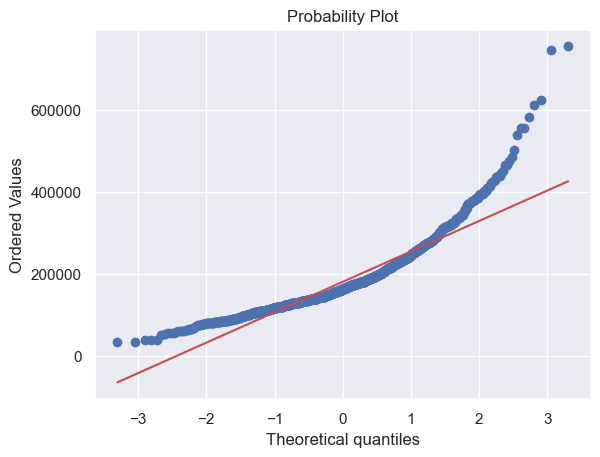

In [166]:
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

In [167]:
df_train['SalePrice'] = np.log(df_train['SalePrice'])

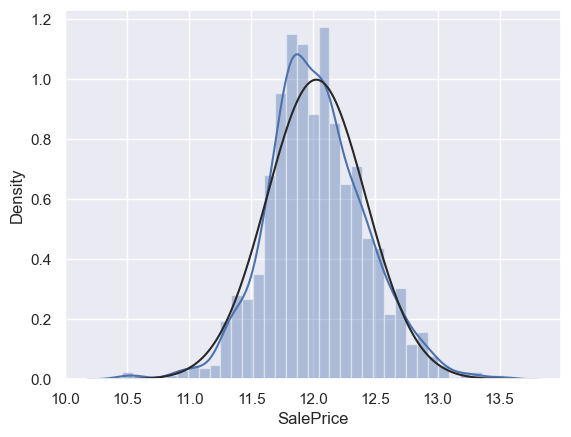

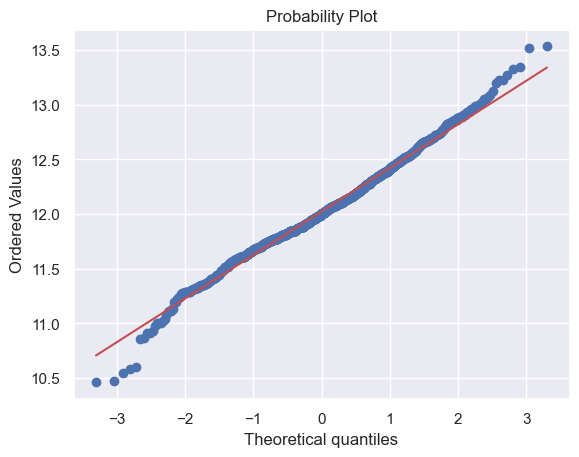

In [168]:
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

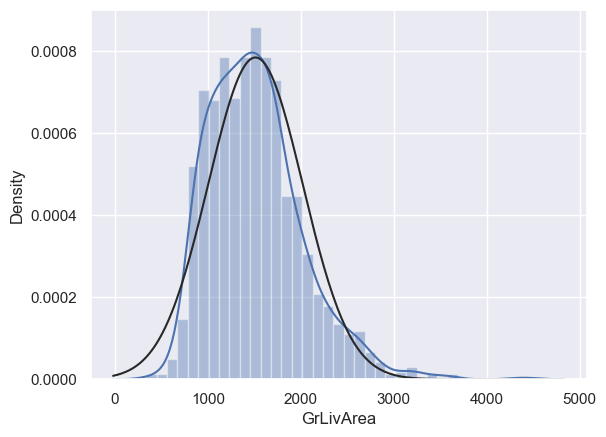

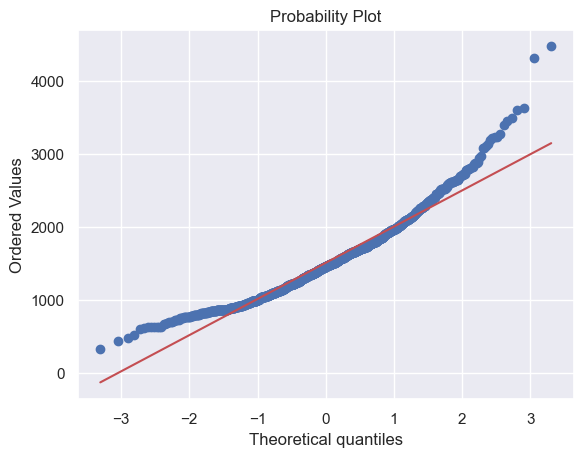

In [170]:
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

In [171]:
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

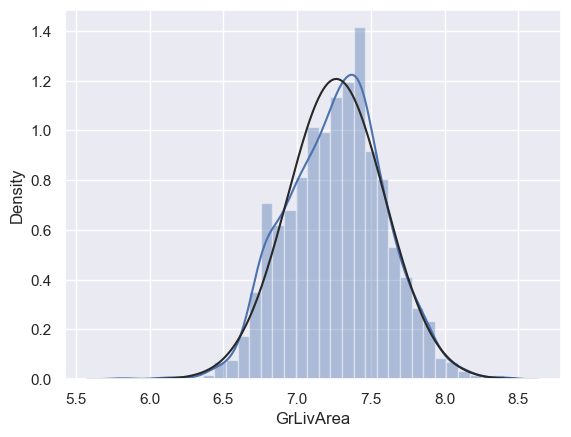

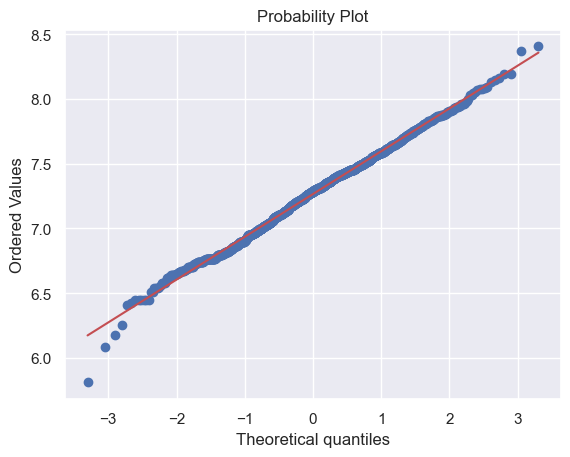

In [172]:
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

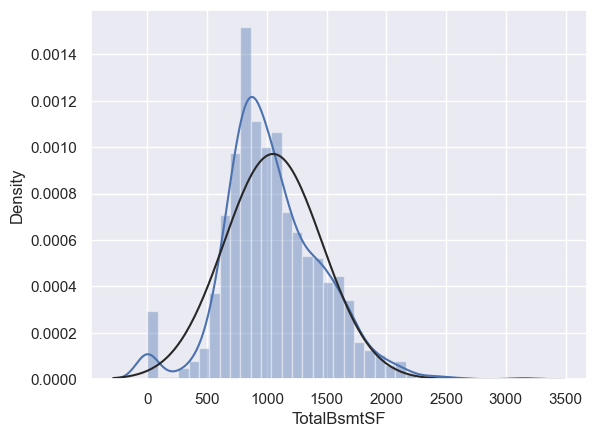

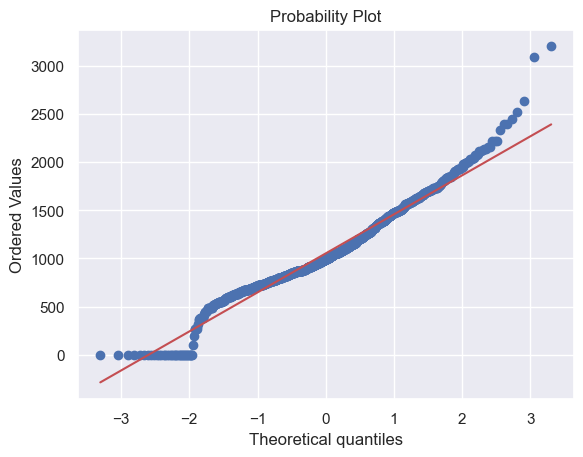

In [173]:
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

In [174]:
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['HasBsmt'] = 0 
df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] = 1

In [175]:
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

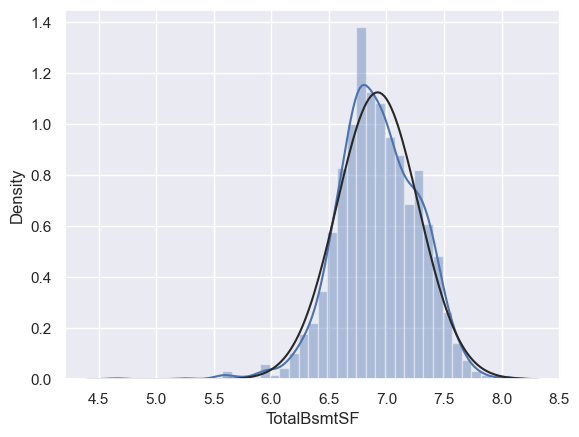

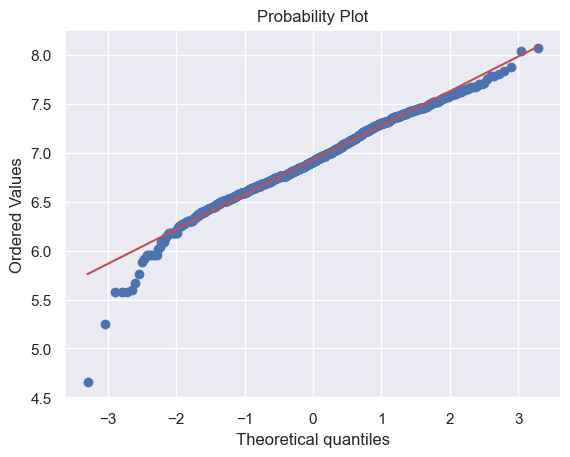

In [176]:
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

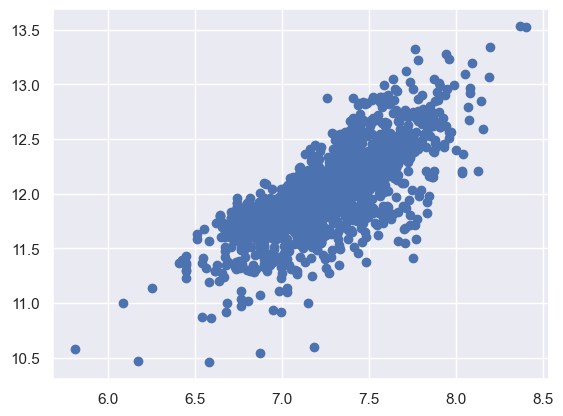

In [177]:
plt.scatter(df_train['GrLivArea'], df_train['SalePrice']);

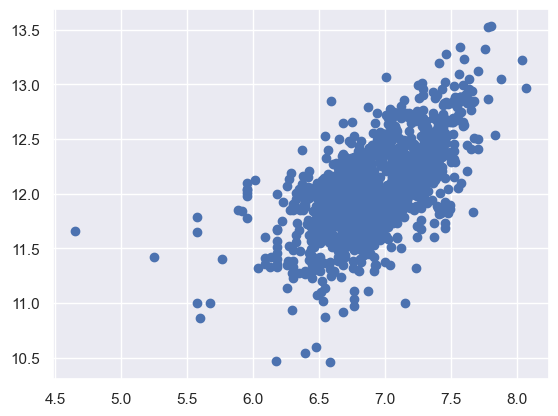

In [178]:
plt.scatter(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF']>0]['SalePrice']);

In [179]:
df_train = pd.get_dummies(df_train)